## Загрузка и первичный анализ данных

Первые 5 строк данных:
          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None

Описательная статистика:
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
s

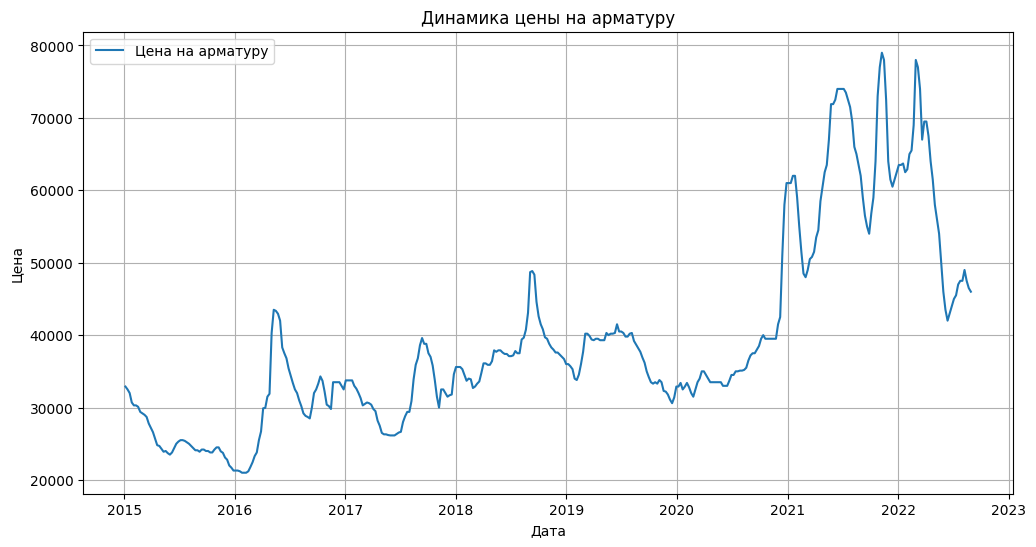

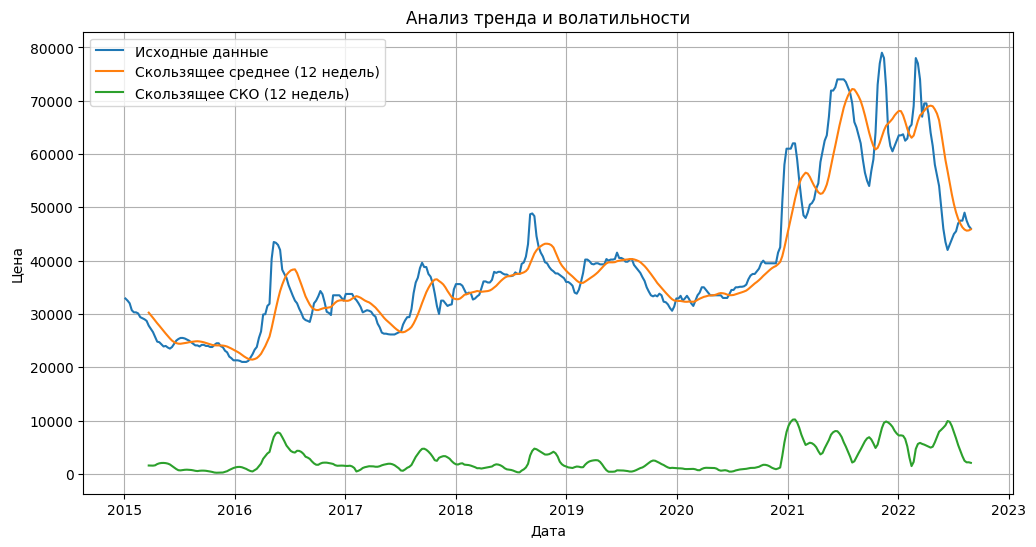

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'C:\\Users\\Karina\\Desktop\\Новая папка\\train.csv'
data = pd.read_csv(file_path)

# Преобразование столбца с датой в datetime
data['dt'] = pd.to_datetime(data['dt'])

# Первичный анализ данных
print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())
print("\nОписательная статистика:")
print(data.describe())

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(data.isnull().sum())

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(data['dt'], data['Цена на арматуру'], label='Цена на арматуру')
plt.title('Динамика цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)
plt.legend()
plt.show()

# Дополнительный анализ: сезонность и тренд
data.set_index('dt', inplace=True)
data['rolling_mean'] = data['Цена на арматуру'].rolling(window=12).mean()
data['rolling_std'] = data['Цена на арматуру'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Цена на арматуру'], label='Исходные данные')
plt.plot(data['rolling_mean'], label='Скользящее среднее (12 недель)')
plt.plot(data['rolling_std'], label='Скользящее СКО (12 недель)')
plt.title('Анализ тренда и волатильности')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)
plt.legend()
plt.show()

## Удаление 'dt' из доп.данных 

In [ ]:
import pandas as pd

def delete_column(csv_file, column_name):
    try:
        df = pd.read_csv(csv_file) # Читаем файл
        if column_name not in df.columns:
            raise ValueError(f"Столбец '{column_name}' не найден")
        df.drop(column_name, axis=1, inplace=True) # Удаляем столбец
        df.to_csv(csv_file, index=False) # Сохраняем изменения
        print(f"Столбец '{column_name}' удален")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{csv_file}' не найден")
    except ValueError as e:
        print(f"Ошибка: {e}")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования:
csv_file = "C:\\Users\\Karina\\Desktop\\Интенсив_3\\Индекс-LME.csv" #Путь к файлу
column_to_delete = "дата" #Столбец для удаления

delete_column(csv_file, column_to_delete)

## Переименовать столбец для удобства

In [ ]:
df = pd.read_csv("C:\\Users\\Karina\\Desktop\\Интенсив_3\\Индекс-LME.csv")
df.rename(columns={"цена": "Цена по индексу-LME"}, inplace=True)
df.to_csv(csv_file, index=False)

## Добавление доп.данных

In [12]:
train = pd.read_csv("C:\\Users\\Karina\\Desktop\\Новая папка\\train.csv")
index = pd.read_csv("C:\\Users\\Karina\\Desktop\\Новая папка\\Индекс-LME.csv")
praise = pd.read_csv("C:\\Users\\Karina\\Desktop\\Новая папка\\Цены-на-сырье.csv")
macro = pd.read_csv("C:\\Users\\Karina\\Desktop\\Новая папка\\Макропоказатели.csv")
download = pd.concat([train, index, praise, macro], axis=1)
download.to_csv("train_1.csv", index=False)

## Обрезаем количество данных в файле train:

In [14]:
import pandas as pd

def truncate_csv(input_csv, output_csv, num_rows=400):
    try:
        df = pd.read_csv(input_csv) # Читаем CSV
        truncated_df = df.head(num_rows) # Обрезаем DataFrame
        truncated_df.to_csv(output_csv, index=False) # Сохраняем в новый файл
        print(f"Файл '{input_csv}' обрезан до {num_rows} строк. Результат в '{output_csv}'.")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{input_csv}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

# Пример использования:
input_file = "C:\\Users\\Karina\\Desktop\\Новая папка\\train_1.csv" # Путь к исходному файлу
output_file = "train_2.csv" # Путь к выходному файлу
num_rows_to_keep = 400 # Количество строк для сохранения
truncate_csv(input_file, output_file, num_rows_to_keep)

Файл 'C:\Users\Karina\Desktop\Новая папка\train_1.csv' обрезан до 400 строк. Результат в 'train_2.csv'.


## Тепловая карта

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\stationary_data.csv', parse_dates=['Date'])

# Создание тепловой карты пропущенных значений
plt.figure(figsize=(20, 15))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений', fontsize=16)
plt.xlabel('Колонки', fontsize=12)
plt.ylabel('Строки (по дате)', fontsize=12)

# Сохранение в файл
plt.savefig('missing_values_heatmap_3(стационароность).png', bbox_inches='tight', dpi=300)
plt.close()

## Удаление пропусков

In [17]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\train_2.csv', parse_dates=['dt'])

# Вычисление процента пропусков в каждом столбце
missing_percent = df.isnull().mean() * 100

# Выбор столбцов, где пропусков больше 75%
columns_to_drop = missing_percent[missing_percent > 75].index

# Удаление этих столбцов
df_cleaned = df.drop(columns=columns_to_drop)

# Сохранение очищенных данных в новый файл
df_cleaned.to_csv('train_3.csv', index=False)

# Вывод информации о проделанной работе
print(f"Удалено столбцов: {len(columns_to_drop)}")
print("Удаленные столбцы:", list(columns_to_drop))
print(f"Оригинальная форма данных: {df.shape}")
print(f"Новая форма данных: {df_cleaned.shape}")

Удалено столбцов: 16
Удаленные столбцы: ['Лом_3А, РФ CPT авто Центральный ФО, руб./т, без НДС', 'Лом_3А, РФ CPT авто Уральский ФО, руб./т, без НДС', 'Лом_3А, РФ CPT авто Южный ФО, руб./т, без НДС', 'Лом_Б26 легированный (Ni 9,3%), РФ CPT, руб./т, без НДС', 'ГБЖ_Россия, FCA руб./т, без НДС', 'Чугун_FOB Бразилия Юг, $/т', 'Чугун_FOB Россия Дальневосточные порты, $/т', 'Лом_3А, РФ FCA ж/д Кемеровская обл, руб./т, без НДС', 'Чугун_CFR Западная Европа, $/т', 'Лом_3А, РФ FCA ж/д Челябинская обл, руб./т, без НДС', 'Лом_3А, РФ FCA ж/д ХМАО, руб./т, без НДС', 'Лом_3А, РФ FCA ж/д Самарская обл, руб./т, без НДС', 'Лом_3А, РФ FCA ж/д Нижегородская обл, руб./т, без НДС', 'Лом_3А, РФ FCA ж/д Новосибирская обл, руб./т, без НДС', 'Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС', 'Базовый индекс потребительских цен на товары и услуги']
Оригинальная форма данных: (400, 64)
Новая форма данных: (400, 48)


## Заполнение пропусков

In [23]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\train_3.csv', parse_dates=['dt'])

# Заполнение пропущенных значений интерполяцией
data_filled = data.interpolate(method='linear', limit_direction='both')

# Вывод информации о заполненных значениях
print("Заполненные значения (интерполяция):")
for column in data.columns:
    if data[column].isnull().any():
        filled_indices = data[column].isnull()
        print(f"\nСтолбец: {column}")
        print("Заполненные строки:")
        for index in data[filled_indices].index:
            print(f"Дата: {data.loc[index, 'dt']}, Заполненное значение: {data_filled.loc[index, column]}")

# Сохранение заполненных данных (опционально)
data_filled.to_csv('train_4.csv', index=False)

Заполненные значения (интерполяция):

Столбец: Чугун_CFR Италия, $/т
Заполненные строки:
Дата: 2015-01-05 00:00:00, Заполненное значение: 285.5
Дата: 2015-01-12 00:00:00, Заполненное значение: 285.5
Дата: 2015-01-19 00:00:00, Заполненное значение: 285.5
Дата: 2015-01-26 00:00:00, Заполненное значение: 285.5
Дата: 2015-02-02 00:00:00, Заполненное значение: 285.5
Дата: 2015-02-09 00:00:00, Заполненное значение: 285.5
Дата: 2015-02-16 00:00:00, Заполненное значение: 285.5
Дата: 2015-02-23 00:00:00, Заполненное значение: 285.5
Дата: 2015-03-02 00:00:00, Заполненное значение: 285.5
Дата: 2015-03-09 00:00:00, Заполненное значение: 285.5
Дата: 2015-03-16 00:00:00, Заполненное значение: 285.5
Дата: 2015-03-23 00:00:00, Заполненное значение: 285.5
Дата: 2015-03-30 00:00:00, Заполненное значение: 285.5
Дата: 2015-04-06 00:00:00, Заполненное значение: 285.5
Дата: 2015-04-13 00:00:00, Заполненное значение: 285.5
Дата: 2015-04-20 00:00:00, Заполненное значение: 285.5
Дата: 2015-04-27 00:00:00, Запо

## Проверка на стационарность 

In [29]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Загрузка данных
df = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\train_4.csv', parse_dates=['dt'])

# Заполнение пропусков интерполяцией
df_filled = df.interpolate(method='linear', limit_direction='both')

# Функция для проверки стационарности (упрощенная версия)
def check_stationarity(series, alpha=0.05):
    # ADF тест
    adf_result = adfuller(series.dropna())
    adf_pvalue = adf_result[1]
    
    # KPSS тест
    kpss_result = kpss(series.dropna())
    kpss_pvalue = kpss_result[1]
    
    # Определение стационарности
    is_stationary = (adf_pvalue < alpha) and (kpss_pvalue > alpha)
    return is_stationary, adf_pvalue, kpss_pvalue

# Выбираем только числовые столбцы (исключая дату)
numeric_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns

# Создаем таблицу для результатов
results = []
for col in numeric_cols:
    is_stationary, adf_p, kpss_p = check_stationarity(df_filled[col])
    results.append({
        'Столбец': col,
        'Стационарен': 'Да' if is_stationary else 'Нет',
        'ADF p-value': f"{adf_p:.4f}",
        'KPSS p-value': f"{kpss_p:.4f}"
    })

# Преобразуем результаты в DataFrame для красивого вывода
results_df = pd.DataFrame(results)
print("\nКраткий отчет о стационарности временных рядов:")
print(results_df.to_string(index=False))

C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The 


Краткий отчет о стационарности временных рядов:
                                                                                         Столбец Стационарен ADF p-value KPSS p-value
                                                                                Цена на арматуру         Нет      0.3200       0.0100
                                                                             Цена по индексу-LME         Нет      0.1924       0.0140
                                Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС         Нет      0.1049       0.0100
                                                        Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т         Нет      0.4327       0.0100
                                                    Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС         Нет      0.7184       0.0100
                                                Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС         Нет      0.5549       0.0100
             

C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
C:\Users\Karina\AppData\Local\Temp\ipykernel_22400\549718976.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The 

## График проверки на стационарность


Использована мультипликативная модель декомпозиции

Анализ стационарности для исходного ряда:
ADF Statistic: -1.9259
p-value: 0.3200
Критические значения:
	1%: -3.4471
	5%: -2.8689
	10%: -2.5707
Вывод: Ряд нестационарен

Анализ стационарности для тренда:
ADF Statistic: -1.8029
p-value: 0.3790
Критические значения:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709
Вывод: Ряд нестационарен

Анализ стационарности для сезонности:
ADF Statistic: -306992099123583.8125
p-value: 0.0000
Критические значения:
	1%: -3.4475
	5%: -2.8691
	10%: -2.5708
Вывод: Ряд стационарен

Анализ стационарности для остатков:
ADF Statistic: -8.8956
p-value: 0.0000
Критические значения:
	1%: -3.4479
	5%: -2.8693
	10%: -2.5709
Вывод: Ряд стационарен


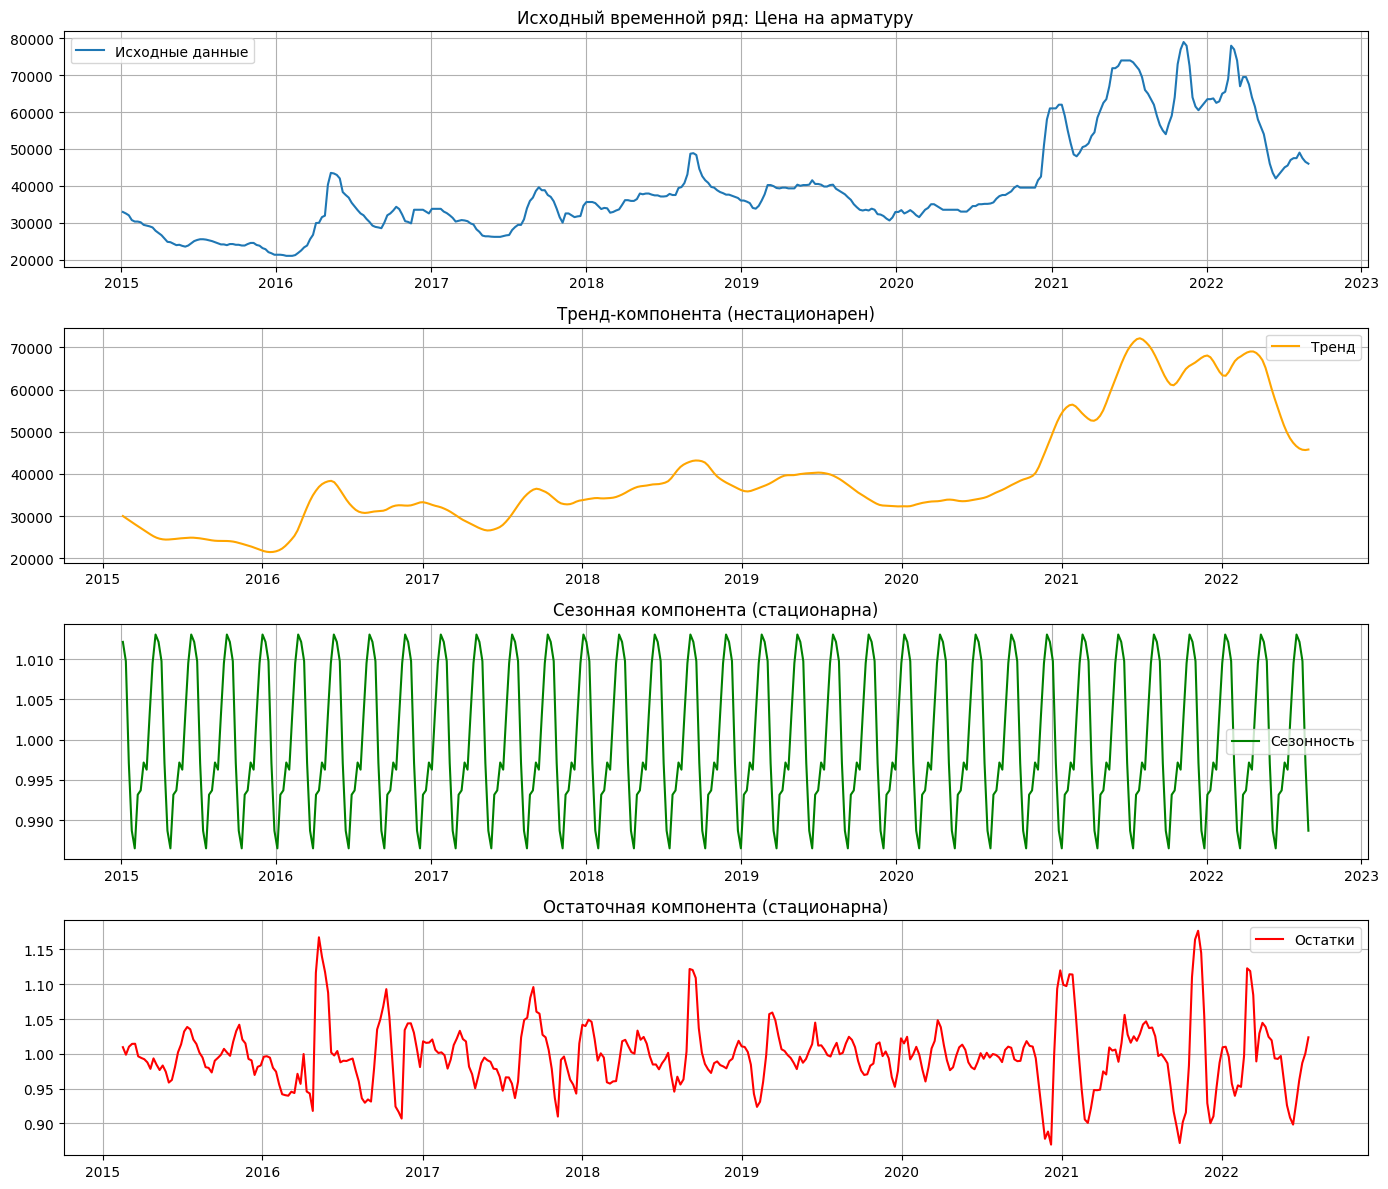

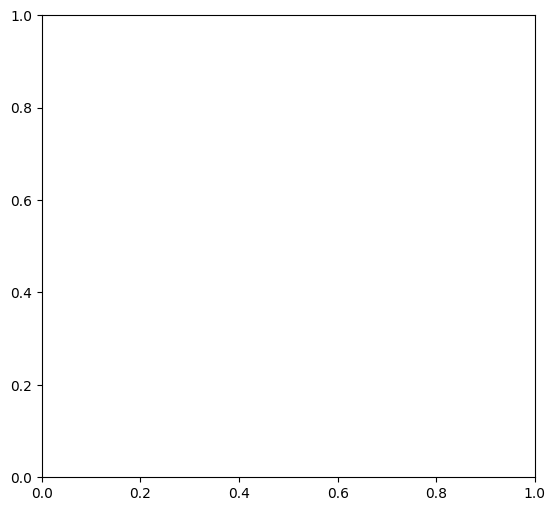

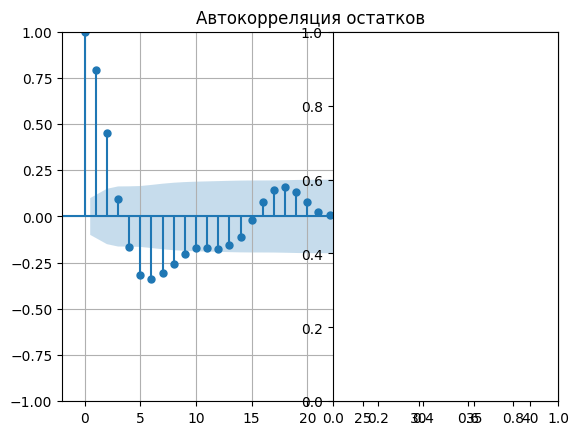

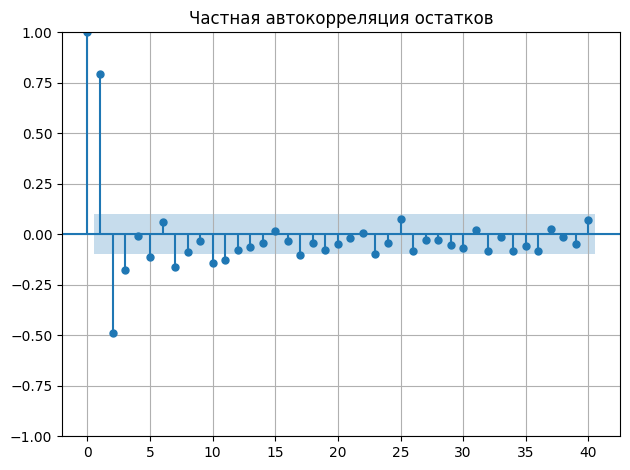


ИТОГОВЫЙ АНАЛИЗ СТАЦИОНАРНОСТИ:
1. Исходный ряд: нестационарен

Анализ стационарности для тренда:
ADF Statistic: -1.8029
p-value: 0.3790
Критические значения:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709
Вывод: Ряд нестационарен
2. Тренд-компонента: нестационарна

Анализ стационарности для сезонности:
ADF Statistic: -306992099123583.8125
p-value: 0.0000
Критические значения:
	1%: -3.4475
	5%: -2.8691
	10%: -2.5708
Вывод: Ряд стационарен
3. Сезонная компонента: стационарна

Анализ стационарности для остатков:
ADF Statistic: -8.8956
p-value: 0.0000
Критические значения:
	1%: -3.4479
	5%: -2.8693
	10%: -2.5709
Вывод: Ряд стационарен
4. Остатки: стационарны

Вывод: Исходный ряд нестационарен. Рекомендации:

Анализ стационарности для тренда:
ADF Statistic: -1.8029
p-value: 0.3790
Критические значения:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709
Вывод: Ряд нестационарен
- Присутствует значимый тренд, рекомендуется дифференцирование

Анализ стационарности для сезонности:
ADF Statistic: -3069920991235

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def analyze_stationarity(series, title=""):
    """Анализирует стационарность ряда и выводит результаты"""
    # Тест Дики-Фуллера
    result = adfuller(series.dropna())
    print(f"\nАнализ стационарности для {title}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Критические значения:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.4f}")
    
    is_stationary = result[1] <= 0.05
    print(f"Вывод: {'Ряд стационарен' if is_stationary else 'Ряд нестационарен'}")
    return is_stationary

# Загрузка данных (исправлено)
try:
    # Пробуем сначала с 'dt', потом с 'Date'
    df = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\cleaned_and_filled_data.csv', 
                    parse_dates=['Date'], 
                    index_col='Date')
except ValueError:
    try:
        df = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\cleaned_and_filled_data.csv', 
                        parse_dates=['dt'], 
                        index_col='dt')
    except ValueError as e:
        print(f"Ошибка: {e}\nПроверьте название столбца с датами в файле.")
        raise

# Проверяем наличие нужного столбца
if 'Цена на арматуру_x' not in df.columns:
    print("Столбец 'Цена на арматуру_x' не найден. Доступные столбцы:")
    print(df.columns)
    raise ValueError("Укажите правильное название столбца с ценами")

# Выбираем нужный столбец и интерполируем пропуски
series = df['Цена на арматуру_x'].interpolate(method='linear', limit_direction='both')

# Декомпозиция временного ряда
try:
    result = seasonal_decompose(series, model='multiplicative', period=12)
    model_type = 'мультипликативная'
except:
    try:
        result = seasonal_decompose(series, model='additive', period=12)
        model_type = 'аддитивная'
    except Exception as e:
        print(f"Ошибка декомпозиции: {e}")
        raise

print(f"\nИспользована {model_type} модель декомпозиции")

# Создаем график с 4 подграфиками
plt.figure(figsize=(14, 12))

# 1. Исходный ряд
plt.subplot(4, 1, 1)
plt.plot(series, label='Исходные данные')
plt.title('Исходный временной ряд: Цена на арматуру')
plt.grid(True)
plt.legend()

# Анализ стационарности исходного ряда
is_orig_stationary = analyze_stationarity(series, "исходного ряда")

# 2. Тренд
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Тренд', color='orange')
plt.title(f'Тренд-компонента ({"стационарен" if analyze_stationarity(result.trend, "тренда") else "нестационарен"})')
plt.grid(True)
plt.legend()

# 3. Сезонность
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Сезонность', color='green')
plt.title(f'Сезонная компонента ({"стационарна" if analyze_stationarity(result.seasonal, "сезонности") else "нестационарна"})')
plt.grid(True)
plt.legend()

# 4. Остатки (циклы + шум)
plt.subplot(4, 1, 4)
residuals = result.resid.dropna()
plt.plot(residuals, label='Остатки', color='red')
plt.title(f'Остаточная компонента ({"стационарна" if analyze_stationarity(residuals, "остатков") else "нестационарна"})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Дополнительный анализ циклов (автокорреляция)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=40, alpha=0.05, title='Автокорреляция остатков')
plt.grid(True)

plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=40, alpha=0.05, title='Частная автокорреляция остатков')
plt.grid(True)

plt.tight_layout()
plt.show()

# Итоговый вывод
print("\nИТОГОВЫЙ АНАЛИЗ СТАЦИОНАРНОСТИ:")
print(f"1. Исходный ряд: {'стационарен' if is_orig_stationary else 'нестационарен'}")
print(f"2. Тренд-компонента: {'стационарна' if analyze_stationarity(result.trend, 'тренда') else 'нестационарна'}")
print(f"3. Сезонная компонента: {'стационарна' if analyze_stationarity(result.seasonal, 'сезонности') else 'нестационарна'}")
print(f"4. Остатки: {'стационарны' if analyze_stationarity(residuals, 'остатков') else 'нестационарны'}")

if is_orig_stationary:
    print("\nВывод: Исходный ряд можно считать стационарным")
else:
    print("\nВывод: Исходный ряд нестационарен. Рекомендации:")
    if not analyze_stationarity(result.trend, 'тренда'):
        print("- Присутствует значимый тренд, рекомендуется дифференцирование")
    if not analyze_stationarity(result.seasonal, 'сезонности'):
        print("- Обнаружена сезонность, рекомендуется сезонное дифференцирование")
    if analyze_stationarity(residuals, 'остатков'):
        print("- После удаления тренда и сезонности остатки стационарны")

## Логарифмирование

In [52]:
import pandas as pd
import numpy as np

# Загрузка данных
data = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\train_4.csv')

# Выбор числовых столбцов (исключая столбец с датой)
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Логарифмирование числовых столбцов (добавляем 1, чтобы избежать логарифма от нуля)
data_log = data.copy()
for column in numeric_columns:
    data_log[column] = np.log(data[column] + 1)  # +1 для избежания log(0)

# Сохранение результата в новый файл
data_log.to_csv('train_4_log.csv', index=False)

print("Данные успешно логарифмированы и сохранены в файл 'train_4_log.csv'.")

Данные успешно логарифмированы и сохранены в файл 'train_4_log.csv'.


In [54]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\train_4.csv', parse_dates=['dt'], index_col='dt')

# Дифференцирование данных (вычисление разницы между текущим и предыдущим значением)
differentiated_data = data.diff()

# Вывод первых 5 строк дифференцированных данных
print(differentiated_data.head())

# Сохранение дифференцированных данных в новый файл (по желанию)
differentiated_data.to_csv('differentiated_train_4.csv')

            Цена на арматуру  Цена по индексу-LME  \
dt                                                  
2015-01-05               NaN                  NaN   
2015-01-12            -400.0                  7.0   
2015-01-19            -500.0                  1.0   
2015-01-26           -1300.0                 -9.0   
2015-02-02            -400.0                 -2.0   

            Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС  \
dt                                                                             
2015-01-05                                                NaN                  
2015-01-12                                                0.0                  
2015-01-19                                                0.0                  
2015-01-26                                                0.0                  
2015-02-02                                              550.0                  

            Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т  \
dt         

## Среднее значение

Средняя цена на арматуру за весь период: -0.00 руб.


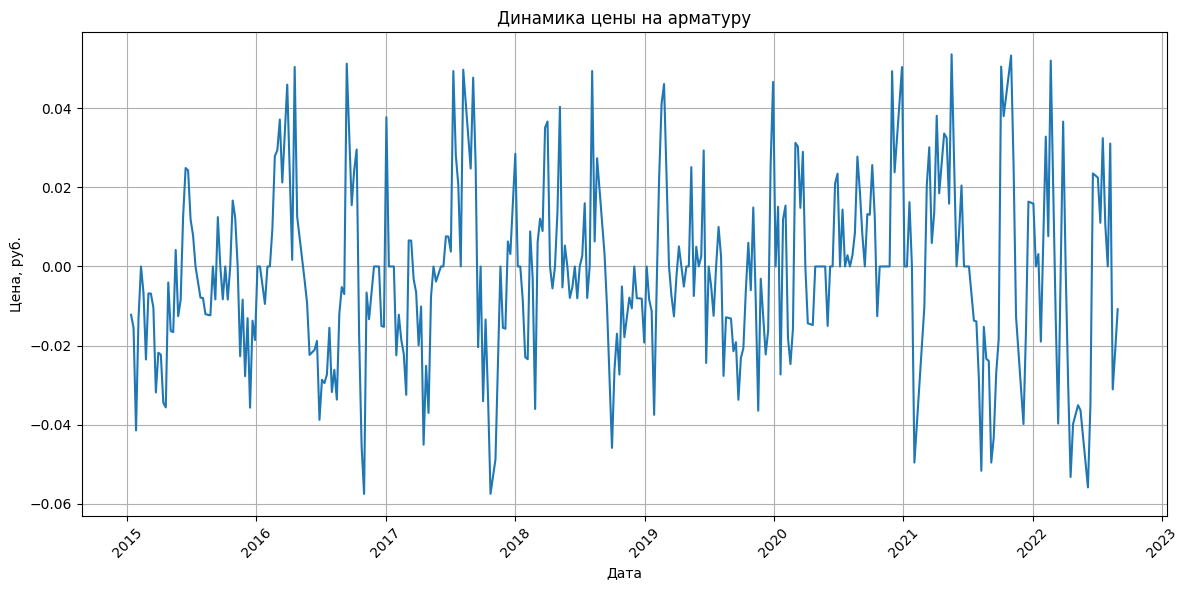

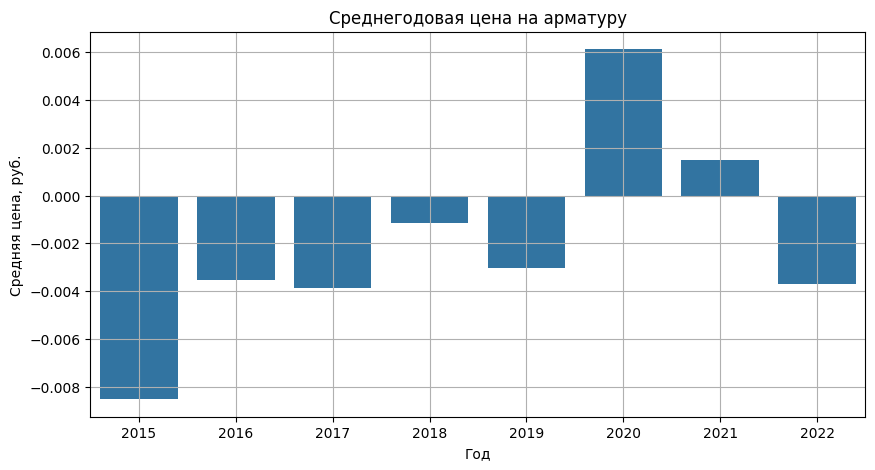


Средние цены по годам:
   Year  Цена на арматуру_x_stationary
0  2015                      -0.008525
1  2016                      -0.003537
2  2017                      -0.003858
3  2018                      -0.001157
4  2019                      -0.003025
5  2020                       0.006129
6  2021                       0.001483
7  2022                      -0.003694


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\обработанные данные.csv', parse_dates=['Date'])

# 1. Проверка среднего значения цены на арматуру
mean_price = data['Цена на арматуру_x_stationary'].mean()
print(f"Средняя цена на арматуру за весь период: {mean_price:.2f} руб.")

# 2. Построение графика динамики цены на арматуру
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Цена на арматуру_x_stationary')
plt.title('Динамика цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена, руб.')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Дополнительный анализ: средние значения по годам
data['Year'] = data['Date'].dt.year
yearly_mean = data.groupby('Year')['Цена на арматуру_x_stationary'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_mean, x='Year', y='Цена на арматуру_x_stationary')
plt.title('Среднегодовая цена на арматуру')
plt.xlabel('Год')
plt.ylabel('Средняя цена, руб.')
plt.grid(True)
plt.show()

print("\nСредние цены по годам:")
print(yearly_mean)

## Дисперсия

Дисперсия цены на арматуру: 0.00


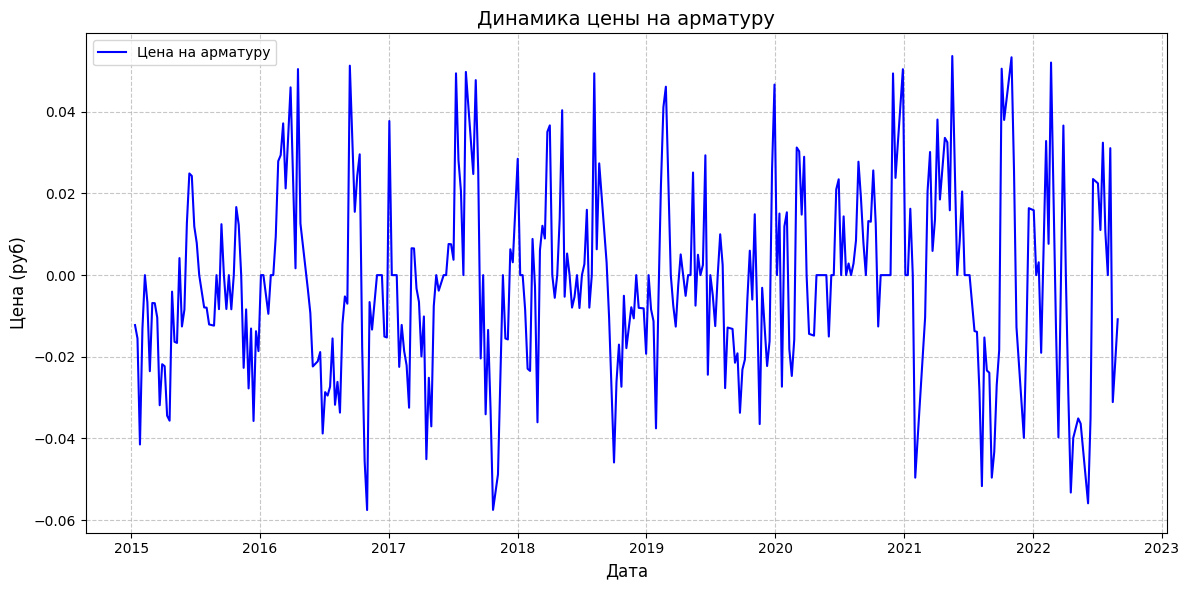

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
data = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\обработанные данные.csv')

# Преобразование столбца 'Date' в datetime (если он не в формате даты)
data['Date'] = pd.to_datetime(data['Date'])

# Расчет дисперсии для столбца "Цена на арматуру_x"
price_variance = data['Цена на арматуру_x_stationary'].var()

print(f"Дисперсия цены на арматуру: {price_variance:.2f}")

# Построение графика изменения цены
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Цена на арматуру_x_stationary'], label='Цена на арматуру', color='blue')
plt.title('Динамика цены на арматуру', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Выбросы

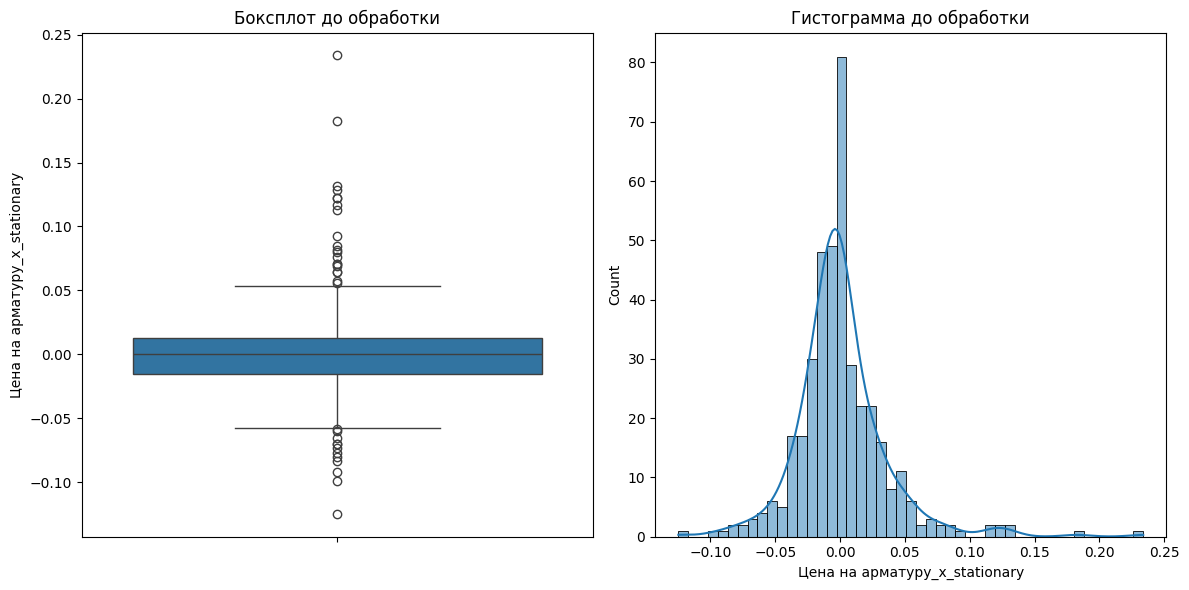

Найдено выбросов по методу IQR: 32
Найдено выбросов по методу Z-оценки: 9


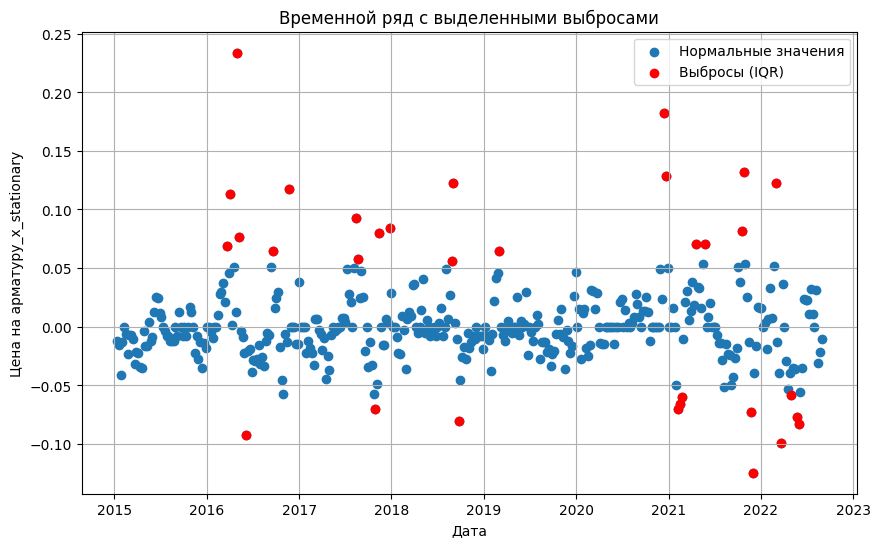

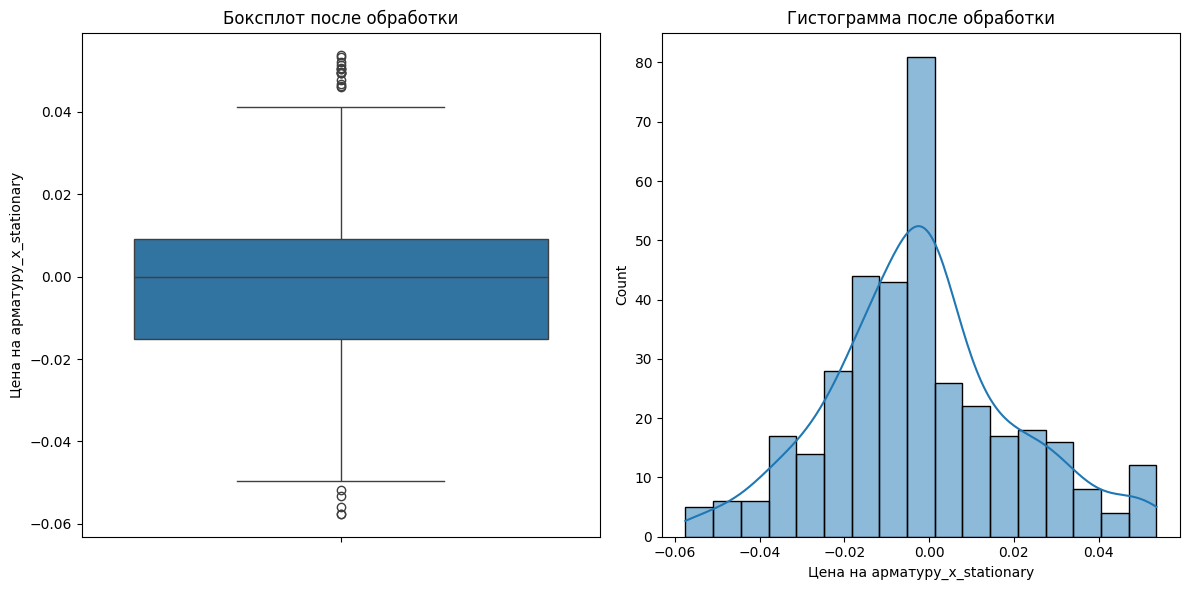


Статистики до обработки:
count    399.000000
mean       0.000840
std        0.035476
min       -0.124703
25%       -0.015504
50%        0.000000
75%        0.012879
max        0.233745
Name: Цена на арматуру_x_stationary, dtype: float64

Статистики после обработки:
count    367.000000
mean      -0.001983
std        0.022026
min       -0.057524
25%       -0.015038
50%        0.000000
75%        0.009224
max        0.053653
Name: Цена на арматуру_x_stationary, dtype: float64

Очищенные данные сохранены в файл: cleaned_stationary_data.csv

Удалено строк: 33
Процент удаленных данных: 8.25%


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('C:\\Users\\Karina\\Desktop\\Новая папка\\stationary_data.csv', parse_dates=['Date'])

# 1. Выберем целевую переменную (предположим, это 'Цена на арматуру_x_stationary')
target_col = 'Цена на арматуру_x_stationary'

# 2. Визуализация распределения до обработки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df[target_col])
plt.title('Боксплот до обработки')
plt.subplot(1, 2, 2)
sns.histplot(df[target_col], kde=True)
plt.title('Гистограмма до обработки')
plt.tight_layout()
plt.show()

# 3. Методы обнаружения выбросов

# Метод межквартильного размаха (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Метод z-оценки
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    return data[z_scores > threshold]

# 4. Обнаружение выбросов
iqr_outliers = detect_outliers_iqr(df, target_col)
zscore_outliers = detect_outliers_zscore(df, target_col)

print(f"Найдено выбросов по методу IQR: {len(iqr_outliers)}")
print(f"Найдено выбросов по методу Z-оценки: {len(zscore_outliers)}")

# 5. Визуализация выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df[target_col], label='Нормальные значения')
plt.scatter(iqr_outliers['Date'], iqr_outliers[target_col], color='red', label='Выбросы (IQR)')
plt.title('Временной ряд с выделенными выбросами')
plt.xlabel('Дата')
plt.ylabel(target_col)
plt.legend()
plt.grid()
plt.show()

# 6. Удаление выбросов (используем IQR метод)
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

# 7. Визуализация после удаления выбросов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean[target_col])
plt.title('Боксплот после обработки')
plt.subplot(1, 2, 2)
sns.histplot(df_clean[target_col], kde=True)
plt.title('Гистограмма после обработки')
plt.tight_layout()
plt.show()

# 8. Сравнение статистик
print("\nСтатистики до обработки:")
print(df[target_col].describe())

print("\nСтатистики после обработки:")
print(df_clean[target_col].describe())

# 9. Сохранение очищенных данных
clean_filename = 'cleaned_stationary_data.csv'
df_clean.to_csv(clean_filename, index=False)
print(f"\nОчищенные данные сохранены в файл: {clean_filename}")

# 10. Дополнительно: информация об удаленных данных
print(f"\nУдалено строк: {len(df) - len(df_clean)}")
print(f"Процент удаленных данных: {(len(df) - len(df_clean)) / len(df) * 100:.2f}%")

In [60]:
import pandas as pd

# Загрузка данных
file_path = 'C:\\Users\\Karina\\Desktop\\Новая папка\\cleaned_stationary_data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Заполнение пропущенных значений интерполяцией (линейной)
data_interpolated = data.interpolate(method='linear')

# Если нужно использовать другой метод, например, временную интерполяцию:
# data_interpolated = data.interpolate(method='time')

# Сохранение в новый файл
output_file = 'C:\\Users\\Karina\\Desktop\\Новая папка\\данные.csv'
data_interpolated.to_csv(output_file)

print(f"Данные с интерполяцией сохранены в файл: {output_file}")

Данные с интерполяцией сохранены в файл: C:\Users\Karina\Desktop\Новая папка\данные.csv


In [73]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk, messagebox
from datetime import datetime, timedelta
import warnings
import re
warnings.filterwarnings('ignore')

class SteelProcurementOptimizer:
    def __init__(self, root):
        self.root = root
        self.root.title("Оптимизатор закупки арматуры")
        self.root.geometry("1000x800")
        
        # Параметры модели
        self.weekly_demand = 100  # Фиксированная недельная потребность в тоннах
        self.max_weeks = 6  # Максимальный период для прогноза
        
        # Загрузка и подготовка данных
        try:
            self.load_and_prepare_data()
            self.create_widgets()
            self.plot_history_with_forecast()  # Первоначальный прогноз
        except Exception as e:
            messagebox.showerror("Ошибка", f"Ошибка инициализации: {str(e)}")
            self.root.destroy()
    
    def load_and_prepare_data(self):
        """Загрузка и подготовка данных для модели"""
        self.df = pd.read_csv('cleaned_stationary_data.csv', parse_dates=['Date'])
        self.df = self.df.sort_values(by='Date').set_index('Date')
        self.price_series = self.df['Цена на арматуру_x_stationary'].dropna()
        
        # Проверка стационарности
        adf_result = adfuller(self.price_series)
        self.d = 1 if adf_result[1] > 0.05 else 0
        
        # Обучение модели ARIMA
        self.model = ARIMA(self.price_series, order=(2, self.d, 1)).fit()
    
    def create_widgets(self):
        """Создание интерфейса"""
        style = ttk.Style()
        style.configure('TFrame', background='#f0f0f0')
        style.configure('TLabel', background='#f0f0f0', font=('Arial', 10))
        style.configure('TButton', font=('Arial', 10), padding=5)
        style.configure('Header.TLabel', font=('Arial', 14, 'bold'))
        
        main_frame = ttk.Frame(self.root)
        main_frame.pack(fill=BOTH, expand=True, padx=20, pady=20)
        
        # Заголовок
        header = ttk.Label(main_frame, text="Оптимизатор закупки арматуры", style='Header.TLabel')
        header.pack(pady=(0, 20))
        
        # Информация о текущей ситуации
        current_frame = ttk.Frame(main_frame)
        current_frame.pack(fill=X, pady=10)
        
        last_date = self.price_series.index[-1].strftime('%Y-%m-%d')
        last_price = self.price_series.iloc[-1]
        
        ttk.Label(current_frame, text=f"Последние данные: {last_date}").pack(side=LEFT)
        ttk.Label(current_frame, text=f"Текущая цена: {last_price:.2f} руб/т").pack(side=LEFT, padx=20)
        ttk.Label(current_frame, text=f"Недельная потребность: {self.weekly_demand} тонн").pack(side=LEFT)
        
        # Кнопка обновления прогноза
        forecast_btn = ttk.Button(main_frame, text="Обновить прогноз", 
                                command=self.plot_history_with_forecast)
        forecast_btn.pack(pady=10)
        
        # Область рекомендаций
        self.recommendation_frame = ttk.LabelFrame(main_frame, text="Рекомендация по закупке")
        self.recommendation_frame.pack(fill=BOTH, expand=True, pady=10)
        
        self.recommendation_text = Text(self.recommendation_frame, height=6, wrap=WORD, 
                                      state=DISABLED, font=('Arial', 10), padx=10, pady=10)
        self.recommendation_text.pack(fill=BOTH, expand=True)
        
        # График
        self.figure = plt.figure(figsize=(10, 5), dpi=100)
        self.canvas = FigureCanvasTkAgg(self.figure, master=main_frame)
        self.canvas.get_tk_widget().pack(fill=BOTH, expand=True)
    
    def forecast_prices(self):
        """Прогнозирование цен на максимальный период"""
        forecast = self.model.get_forecast(steps=self.max_weeks)
        return forecast.predicted_mean, forecast.conf_int()
    
    def calculate_optimal_period(self, forecast):
        """Расчет оптимального периода закупки на основе прогноза"""
        current_price = self.price_series.iloc[-1]
        optimal_weeks = 1  # По умолчанию 1 неделя
        
        # Ищем первый значительный рост цен (>1%)
        for i in range(len(forecast)):
            if forecast[i] > current_price * 1.01:
                optimal_weeks = i + 1
                break
        
        return optimal_weeks
    
    def plot_history_with_forecast(self):
        """Отображение истории с прогнозом и рекомендацией"""
        try:
            # Получаем прогноз
            forecast, conf_int = self.forecast_prices()
            
            # Рассчитываем оптимальный период
            optimal_weeks = self.calculate_optimal_period(forecast)
            current_price = self.price_series.iloc[-1]
            forecast_price = forecast[optimal_weeks-1]
            
            # Расчет экономии
            total_demand = self.weekly_demand * optimal_weeks
            savings = (current_price - forecast_price) * total_demand if forecast_price < current_price else 0
            
            # Формируем рекомендацию
            rec_text = f"""Рекомендуемый период закупки: {optimal_weeks} недель(и)
            
Объем закупки: {total_demand} тонн
Текущая цена: {current_price:.2f} руб/т
Прогнозируемая цена: {forecast_price:.2f} руб/т
Потенциальная экономия: {savings:.2f} руб

Прогноз построен на {self.max_weeks} недель вперед.
"""
            # Обновляем текст рекомендации
            self.recommendation_text.config(state=NORMAL)
            self.recommendation_text.delete(1.0, END)
            self.recommendation_text.insert(END, rec_text)
            self.recommendation_text.config(state=DISABLED)
            
            # Обновляем график
            self.figure.clear()
            ax = self.figure.add_subplot(111)
            
            # Исторические данные (последние 90 дней)
            history = self.price_series.last('90D')
            ax.plot(history.index, history, label='История цен', color='blue', linewidth=2)
            
            # Прогноз
            forecast_dates = pd.date_range(start=history.index[-1], periods=len(forecast)+1)[1:]
            ax.plot(forecast_dates, forecast, label='Прогноз цен', color='green', linewidth=2)
            ax.fill_between(forecast_dates, 
                          conf_int.iloc[:, 0], 
                          conf_int.iloc[:, 1], 
                          color='green', alpha=0.1)
            
            # Оптимальный период
            ax.axvline(forecast_dates[optimal_weeks-1], color='red', linestyle='--',
                      linewidth=2, label=f'Рекомендуемый период ({optimal_weeks} нед.)')
            
            ax.set_title(f'Прогноз цен на арматуру на {self.max_weeks} недель', fontsize=12)
            ax.set_xlabel('Дата', fontsize=10)
            ax.set_ylabel('Цена (руб/т)', fontsize=10)
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.7)
            
            self.canvas.draw()
            
        except Exception as e:
            messagebox.showerror("Ошибка", f"Не удалось построить прогноз: {str(e)}")

if __name__ == "__main__":
    from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
    
    root = Tk()
    app = SteelProcurementOptimizer(root)
    root.mainloop()

KeyboardInterrupt: 

<Figure size 960x364 with 0 Axes>

## Тест на стационарность

In [84]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Загрузка данных
file_path = 'C:\\Users\\Karina\\Desktop\\Новая папка\\Обработанные данные.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Функция для выполнения теста Дики-Фуллера (ADF)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Вывод: Ряд стационарен (отвергаем H0)")
    else:
        print("Вывод: Ряд нестационарен (не отвергаем H0)")

# Функция для выполнения теста KPSS
def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Вывод: Ряд нестационарен (отвергаем H0)")
    else:
        print("Вывод: Ряд стационарен (не отвергаем H0)")

# Проверка стационарности для всех столбцов
for column in data.columns:
    print(f"\nТест для столбца: {column}")
    print("-------------------------------")
    print("Результаты теста Дики-Фуллера (ADF):")
    adf_test(data[column].dropna())
    print("\nРезультаты теста KPSS:")
    kpss_test(data[column].dropna())
    print("\n" + "="*50 + "\n")


Тест для столбца: Цена на арматуру_x_stationary
-------------------------------
Результаты теста Дики-Фуллера (ADF):
ADF Statistic: -8.598756318151056
p-value: 6.961059677353384e-14
Critical Values:
   1%: -3.4483935212959844
   5%: -2.8694912343676497
   10%: -2.571005879151811
Вывод: Ряд стационарен (отвергаем H0)

Результаты теста KPSS:
KPSS Statistic: 0.24358986680587205
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Вывод: Ряд стационарен (не отвергаем H0)



Тест для столбца: Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС_stationary
-------------------------------
Результаты теста Дики-Фуллера (ADF):
ADF Statistic: -19.082407943063647
p-value: 0.0
Critical Values:
   1%: -3.448343869853195
   5%: -2.869469418606909
   10%: -2.570994248260623
Вывод: Ряд стационарен (отвергаем H0)

Результаты теста KPSS:
KPSS Statistic: 0.1482054899292041
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Выв